In [1]:
import pandas as pd
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.parsing.preprocessing import remove_stopwords
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing
- load lyrics dataset
- load wikipedia dataset and merge song genre
- change song genre into list
- tokenize and remove stopwords

In [2]:
df = pd.read_csv('../data/cleaned_lyrics.csv')

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,no.,year,song,artist(s),song_wiki_url,artist_wiki_url,lyrics
0,0,0,0,1,1958,"""Volare""",Domenico Modugno,['https://en.wikipedia.org/wiki/Volare_(song)'],['https://en.wikipedia.org/wiki/Domenico_Modug...,Penso che un sogno cosi` non ritorni mai piu` ...
1,1,1,1,2,1958,"""All I Have to Do Is Dream""",The Everly Brothers,['https://en.wikipedia.org/wiki/All_I_Have_to_...,['https://en.wikipedia.org/wiki/The_Everly_Bro...,Dream dream dream dream Dream dream drea...
2,2,2,2,3,1958,"""Don't""",Elvis Presley,['https://en.wikipedia.org/wiki/Don%27t_(Elvis...,['https://en.wikipedia.org/wiki/Elvis_Presley'],Don't don't that's what you say Each time t...
3,3,3,3,4,1958,"""Witch Doctor""",David Seville,['https://en.wikipedia.org/wiki/Witch_Doctor_(...,['https://en.wikipedia.org/wiki/Ross_Bagdasari...,{Movie version - DJ: Yeah! In the place to be!...
4,4,4,4,5,1958,"""Patricia""",Perez Prado,['https://en.wikipedia.org/wiki/Patricia_(Pere...,['https://en.wikipedia.org/wiki/Perez_Prado'],Kiss her and your lips will always want Patric...
...,...,...,...,...,...,...,...,...,...,...
6266,6346,6346,6346,96,2021,"""Things a Man Oughta Know""",Lainey Wilson,['https://en.wikipedia.org/wiki/Things_a_Man_O...,['https://en.wikipedia.org/wiki/Lainey_Wilson'],I can hook a trailer on a two-inch hitch I ca...
6267,6347,6347,6347,97,2021,"""Throat Baby""",BRS Kash,['https://en.wikipedia.org/wiki/Throat_Baby_(G...,['https://en.wikipedia.org/wiki/BRS_Kash'],What's happenin' Chi Chi? Sexy lil' bitc...
6268,6348,6348,6348,98,2021,"""Tombstone""",Rod Wave,['https://en.wikipedia.org/wiki/Tombstone_(son...,['https://en.wikipedia.org/wiki/Rod_Wave'],Damn this motherfucker too crazy Saucii Let...
6269,6349,6349,6349,99,2021,"""Drinkin' Beer. Talkin' God. Amen.""",Chase Rice,['https://en.wikipedia.org/wiki/Drinkin%27_Bee...,"['https://en.wikipedia.org/wiki/Chase_Rice', '...","Firewood crackle in the fall air ""Red Dirt"" p..."


In [4]:
genredf = pd.read_csv('../data/wiki_box_data.csv')

In [5]:
genredf

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,no.,year,song,artist(s),song_wiki_url,artist_wiki_url,song_genre,artist_genre,artist_gender,artist_age,type,collab
0,0,0,0,0,0,1,1958,"""Volare (Nel blu dipinto di blu)""",Domenico Modugno,['https://en.wikipedia.org/wiki/Volare_(song)'],['https://en.wikipedia.org/wiki/Domenico_Modug...,['Pop'],"[['Neapolitan song', 'folk']]",male,30.0,NaN,NaN
1,1,1,1,1,1,2,1958,"""All I Have to Do Is Dream"" / ""Claudette""",The Everly Brothers,['https://en.wikipedia.org/wiki/All_I_Have_to_...,['https://en.wikipedia.org/wiki/The_Everly_Bro...,"['Jangle pop', '[2]']","[['Country rock', '[1]', '[2]', '[3]', '[4]', ...",male,21.0,NaN,NaN
2,2,2,2,2,2,3,1958,"""Don't"" / ""I Beg of You""",Elvis Presley,['https://en.wikipedia.org/wiki/Don%27t_(Elvis...,['https://en.wikipedia.org/wiki/Elvis_Presley'],"['Ballad', 'pop']","[['Rock and roll', 'pop', 'rockabilly', 'count...",male,23.0,NaN,NaN
3,3,3,3,3,3,4,1958,"""Witch Doctor""",David Seville,['https://en.wikipedia.org/wiki/Witch_Doctor_(...,['https://en.wikipedia.org/wiki/Ross_Bagdasari...,"['Comedy', 'rockabilly', 'scat', 'novelty', 'c...",unknown,male,39.0,NaN,NaN
4,4,4,4,4,4,5,1958,"""Patricia""",Perez Prado,['https://en.wikipedia.org/wiki/Patricia_(Pere...,['https://en.wikipedia.org/wiki/Perez_Prado'],unknown,[['Mambo']],male,42.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,6346,6346,6346,6346,6346,96,2021,"""Things a Man Oughta Know""",Lainey Wilson,['https://en.wikipedia.org/wiki/Things_a_Man_O...,['https://en.wikipedia.org/wiki/Lainey_Wilson'],['Country'],[['Country']],mixed,29.0,single,False
6347,6347,6347,6347,6347,6347,97,2021,"""Throat Baby (Go Baby)""",BRS Kash,['https://en.wikipedia.org/wiki/Throat_Baby_(G...,['https://en.wikipedia.org/wiki/BRS_Kash'],"['Dirty rap', 'R&B']","[['Hip hop', 'trap']]",male,28.0,single,False
6348,6348,6348,6348,6348,6348,98,2021,"""Tombstone""",Rod Wave,['https://en.wikipedia.org/wiki/Tombstone_(son...,['https://en.wikipedia.org/wiki/Rod_Wave'],unknown,"[['Hip hop', 'R&B']]",male,22.0,single,False
6349,6349,6349,6349,6349,6349,99,2021,"""Drinkin' Beer. Talkin' God. Amen.""",Chase Rice featuring Florida Georgia Line,['https://en.wikipedia.org/wiki/Drinkin%27_Bee...,"['https://en.wikipedia.org/wiki/Chase_Rice', '...",['Country'],"[['Country pop', 'country rock'], ['Country', ...",male,35.5,group,True


In [6]:
# only keep the song genre information
genredf = genredf[['Unnamed: 0', 'song_genre']]
genredf

,Unnamed: 0,song_genre
0,0,['Pop']
1,1,"['Jangle pop', '[2]']"
2,2,"['Ballad', 'pop']"
3,3,"['Comedy', 'rockabilly', 'scat', 'novelty', 'c..."
4,4,unknown
...,...,...
6346,6346,['Country']
6347,6347,"['Dirty rap', 'R&B']"
6348,6348,unknown
6349,6349,['Country']


In [7]:
# merge using Unnamed: 0 column
df = pd.merge(df, genredf, how = 'left', left_on = 'Unnamed: 0', right_on = 'Unnamed: 0')

In [8]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,no.,year,song,artist(s),song_wiki_url,artist_wiki_url,lyrics,song_genre
0,0,0,0,1,1958,"""Volare""",Domenico Modugno,['https://en.wikipedia.org/wiki/Volare_(song)'],['https://en.wikipedia.org/wiki/Domenico_Modug...,Penso che un sogno cosi` non ritorni mai piu` ...,['Pop']
1,1,1,1,2,1958,"""All I Have to Do Is Dream""",The Everly Brothers,['https://en.wikipedia.org/wiki/All_I_Have_to_...,['https://en.wikipedia.org/wiki/The_Everly_Bro...,Dream dream dream dream Dream dream drea...,"['Jangle pop', '[2]']"
2,2,2,2,3,1958,"""Don't""",Elvis Presley,['https://en.wikipedia.org/wiki/Don%27t_(Elvis...,['https://en.wikipedia.org/wiki/Elvis_Presley'],Don't don't that's what you say Each time t...,"['Ballad', 'pop']"
3,3,3,3,4,1958,"""Witch Doctor""",David Seville,['https://en.wikipedia.org/wiki/Witch_Doctor_(...,['https://en.wikipedia.org/wiki/Ross_Bagdasari...,{Movie version - DJ: Yeah! In the place to be!...,"['Comedy', 'rockabilly', 'scat', 'novelty', 'c..."
4,4,4,4,5,1958,"""Patricia""",Perez Prado,['https://en.wikipedia.org/wiki/Patricia_(Pere...,['https://en.wikipedia.org/wiki/Perez_Prado'],Kiss her and your lips will always want Patric...,unknown
...,...,...,...,...,...,...,...,...,...,...,...
6266,6346,6346,6346,96,2021,"""Things a Man Oughta Know""",Lainey Wilson,['https://en.wikipedia.org/wiki/Things_a_Man_O...,['https://en.wikipedia.org/wiki/Lainey_Wilson'],I can hook a trailer on a two-inch hitch I ca...,['Country']
6267,6347,6347,6347,97,2021,"""Throat Baby""",BRS Kash,['https://en.wikipedia.org/wiki/Throat_Baby_(G...,['https://en.wikipedia.org/wiki/BRS_Kash'],What's happenin' Chi Chi? Sexy lil' bitc...,"['Dirty rap', 'R&B']"
6268,6348,6348,6348,98,2021,"""Tombstone""",Rod Wave,['https://en.wikipedia.org/wiki/Tombstone_(son...,['https://en.wikipedia.org/wiki/Rod_Wave'],Damn this motherfucker too crazy Saucii Let...,unknown
6269,6349,6349,6349,99,2021,"""Drinkin' Beer. Talkin' God. Amen.""",Chase Rice,['https://en.wikipedia.org/wiki/Drinkin%27_Bee...,"['https://en.wikipedia.org/wiki/Chase_Rice', '...","Firewood crackle in the fall air ""Red Dirt"" p...",['Country']


## Stop words
- Get top n words and use them as stop words list
- Make manually-sifted custom stop words list

In [9]:
def word_freq(token_lst):
    '''Given a set of tokens, return a sorted dictionary of words and their frequency'''
    countdict = {}
    for word in token_lst:
        if word not in countdict:
            countdict[word] = 0
        countdict[word] += 1
    stop_words = []
    return sorted(countdict.items(), key = lambda x: x[1], reverse = True)

In [10]:
# raw tokens
df['raw_tokens'] = df['lyrics'].apply(lambda x: x.split())
df['lower_tokens'] = df['raw_tokens'].apply(lambda x: [w.lower() for w in x])

In [11]:
# get top n words
freq_lst = word_freq([word for tokens in df['lower_tokens'].tolist() for word in tokens])
freq_lst

[('the', 124367),
 ('you', 96293),
 ('i', 92605),
 ('and', 78672),
 ('to', 67006),
 ('a', 58726),
 ('me', 46067),
 ('in', 40028),
 ('it', 39778),
 ('my', 36794),
 ('of', 36559),
 ('that', 29641),
 ('on', 29151),
 ('your', 23413),
 ("i'm", 22243),
 ('be', 21530),
 ('love', 20894),
 ('for', 20837),
 ('is', 20812),
 ('with', 19796),
 ('all', 19299),
 ("don't", 18373),
 ('we', 18040),
 ('like', 17494),
 ('know', 16977),
 ('so', 16928),
 ('but', 15720),
 ('up', 15620),
 ('yeah', 15495),
 ('oh', 15050),
 ('no', 14428),
 ('do', 14291),
 ('baby', 13932),
 ('just', 13871),
 ('when', 13706),
 ('he', 13414),
 ("it's", 13400),
 ('this', 13118),
 ('what', 12886),
 ('get', 12825),
 ('if', 12221),
 ('can', 12102),
 ('got', 12061),
 ('she', 11647),
 ('now', 10924),
 ('go', 10919),
 ('-', 10203),
 ('out', 10068),
 ('have', 9904),
 ('was', 9719),
 ('they', 9702),
 ('one', 9652),
 ("you're", 9624),
 ('down', 9416),
 ('at', 9330),
 ('her', 9012),
 ('are', 8866),
 ('his', 8720),
 ('want', 8693),
 ('from', 

In [12]:
top50_stopwords = [pair[0] for pair in freq_lst][:50]
top100_stopwords = [pair[0] for pair in freq_lst][:100]
top150_stopwords = [pair[0] for pair in freq_lst][:150]
top200_stopwords = [pair[0] for pair in freq_lst][:200]

In [13]:
# words left in : 'love', 'baby', 'time', 'never', 'girl', 'tell', 'right', 'night', 'man', 'feel', 'good'
custom_stopwords = ['the', 'you', 'i', 'and', 'to', 'a', 'me', 'in', 'it', 'my', 'of',
                    'that', 'on', 'your', 'i\'m', 'be', 'for', 'is', 'with', 'all', 'don\'t', 
                    'we', 'like', 'know', 'so', 'but', 'up', 'yeah', 'oh', 'no', 'just', 'when',
                    'he', 'it\'s', 'this', 'what', 'get', 'if', 'can', 'got', 'she', 'now', 'go',
                    '-', 'out', 'have', 'was', 'they', 'one', 'you\'re', 'down', 'at', 'her', 'are',
                    'his', 'want', 'from', 'by', 'come', 'say', 'see', 'can\'t', 'not', 'make',
                    'let', 'back', 'wanna', 'as', 'way', 'take', 'will', 'i\'ll', 'there', 'how',
                    'about', 'or', '\'cause', 'gonna', 'ain\'t', 'him', 'need', 'that\'s', 'ooh',
                    'could', 'here']

In [14]:
# remove stopwords
df['no_top50_sw'] = df['lyrics'].apply(lambda x: remove_stopwords(x.lower(), top50_stopwords).split())
df['no_top100_sw'] = df['lyrics'].apply(lambda x: remove_stopwords(x.lower(), top100_stopwords).split())
df['no_top150_sw'] = df['lyrics'].apply(lambda x: remove_stopwords(x.lower(), top150_stopwords).split())
df['no_top200_sw'] = df['lyrics'].apply(lambda x: remove_stopwords(x.lower(), top200_stopwords).split())
df['no_custom_sw'] = df['lyrics'].apply(lambda x: remove_stopwords(x.lower(), custom_stopwords).split())

In [15]:
print(df['no_top50_sw'][10])
print(df['no_top100_sw'][10])
print(df['no_top150_sw'][10])
print(df['no_top200_sw'][10])
print(df['no_custom_sw'][10])


['people', 'see', 'us', 'everywhere', 'they', 'think', 'really', 'care', 'myself', "can't", 'deceive', 'only', 'make', 'believe', 'one', 'only', 'prayer', 'someday', "you'll", 'care', 'hopes', 'dreams', 'come', 'true', 'one', 'only', 'one', 'will', 'ever', 'how', 'much', 'only', 'prayer', 'will', 'someday', "you'll", 'care', 'only', 'make', 'believe', 'hopes', 'dreams', 'come', 'true', 'life', "i'd", 'give', 'heart', 'wedding', 'ring', 'everything', 'heart', "can't", 'control', 'rule', 'very', 'soul', 'only', 'prayer', 'will', 'someday', "you'll", 'care', 'only', 'make', 'believe', 'one', 'only', 'prayer', 'some', 'day', "you'll", 'care', 'hopes', 'dreams', 'come', 'true', 'one', 'only', 'one', 'will', 'ever', 'how', 'much', 'prayers', 'hopes', 'schemes', 'are', 'every', 'dream', 'only', 'make', 'believe', 'make', 'believe']
['people', 'us', 'everywhere', 'think', 'really', 'care', 'myself', 'deceive', 'only', 'believe', 'only', 'prayer', 'someday', "you'll", 'care', 'hopes', 'dreams',

## Working with Genre
- return string into list
- calculate the top 5 genres

In [16]:
def str_to_lst(lstr):
    '''Turn a str(list) back to list form'''
    if pd.isna(lstr):
        return 'no data'
    else:
        return lstr.strip('[]\'\"').split('\', \'')

In [17]:
df['song_genre_list'] = df.song_genre.apply(lambda x: str_to_lst(x))

In [18]:
top_genre = word_freq([genre for song in df['song_genre_list'].tolist() for genre in song])
top_genre

[('R&B', 1072),
 ('Pop', 708),
 ('unknown', 613),
 ('[1', 585),
 ('[1]', 486),
 ('Hip hop', 377),
 ('[2', 372),
 ('Pop rock', 313),
 ('[2]', 306),
 ('a', 292),
 ('Country', 274),
 ('Soft rock', 262),
 ('pop', 261),
 ('Soul', 239),
 ('soul', 218),
 ('Rock', 180),
 ('Dance-pop', 167),
 ('[3', 162),
 ('[3]', 156),
 ('n', 146),
 ('o', 146),
 (' ', 146),
 ('d', 146),
 ('t', 146),
 ('soft rock', 139),
 ('pop rock', 123),
 ('Disco', 116),
 ('funk', 114),
 ('dance-pop', 110),
 ('Rock and roll', 100),
 ('hip hop', 94),
 ('Alternative rock', 93),
 ('Funk', 89),
 ('trap', 88),
 ('disco', 82),
 ('new wave', 77),
 ('Electropop', 77),
 ('[4', 73),
 ('Country pop', 73),
 ('Folk rock', 72),
 ('Hard rock', 67),
 ('New wave', 66),
 ('hard rock', 62),
 ('[4]', 62),
 ('synth-pop', 60),
 ('electropop', 57),
 ('alternative rock', 55),
 ('new jack swing', 55),
 ('Glam metal', 48),
 ('power pop', 46),
 ('Synth-pop', 45),
 ('Trap', 45),
 ('Doo-wop', 42),
 ('EDM', 39),
 ('rock and roll', 38),
 ('blue-eyed soul'

- For the analyses below, I'll mostly focus on the top 5 genre:
    - R&B
    - Pop
    - Hip hop
    - Pop rock
    - Country


# Word Length
- Whether average length of words (number of characters) changes across time

In [19]:
word_length = {}
year = list(range(1958, 2022))
for i in df.index:
    if df.loc[i, 'year'] not in word_length:
        word_length[df.loc[i, 'year']] = []
    word_length[df.loc[i, 'year']].append(np.mean([len(word) for word in df.loc[i, 'raw_tokens']]))
ave_length = {}
for key, value in word_length.items():
    ave_length[key] = np.mean(value)

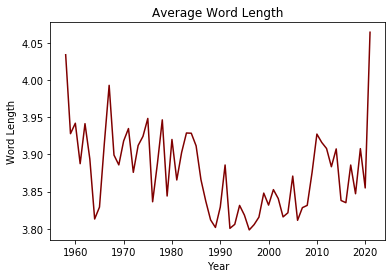

In [20]:
plt.plot(list(ave_length.keys()), list(ave_length.values()), color = 'maroon')
plt.xlabel('Year')
plt.ylabel('Word Length')
plt.title('Average Word Length');

<BarContainer object of 64 artists>

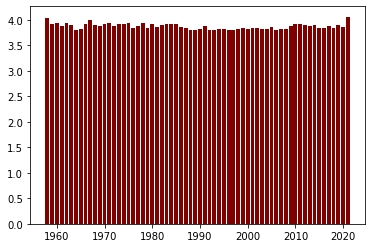

In [21]:
plt.bar(ave_length.keys(), ave_length.values(), color = 'maroon')

- There doesn't seem to be a clear trend, and the differences in word length is minimal when viewed as a bar chart.

In [22]:
[word_length[year] for year in range(1958, 1961)]

[[4.153846153846154,
  3.5170454545454546,
  3.8666666666666667,
  3.670807453416149,
  4.265734265734266,
  4.362637362637362,
  3.797356828193833,
  8.0,
  4.02803738317757,
  3.610526315789474,
  3.841463414634146,
  4.326018808777429,
  3.606299212598425,
  3.7306590257879657,
  3.2658227848101267,
  4.068807339449541,
  4.574803149606299,
  3.727810650887574,
  3.3978494623655915,
  3.8095238095238093,
  4.086666666666667,
  3.5655737704918034,
  5.665573770491803,
  3.421259842519685,
  4.781976744186046,
  3.5445026178010473,
  4.156626506024097,
  4.132075471698113,
  4.322834645669292,
  3.3076923076923075,
  3.730769230769231,
  3.898245614035088,
  3.5153846153846153,
  4.653846153846154,
  3.9343434343434343,
  4.859223300970874,
  4.518018018018018,
  3.783132530120482,
  3.59748427672956,
  3.8917525773195876,
  3.624413145539906,
  3.935483870967742,
  2.88659793814433,
  4.221153846153846,
  4.4925634295713035,
  4.108843537414966,
  4.304878048780488,
  3.7061403508771

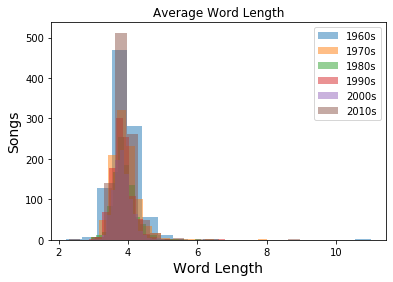

In [23]:
plt.hist([w for song in [word_length[year] for year in range(1960, 1970)] for w in song], bins=20, alpha=0.5, label="1960s")
plt.hist([w for song in [word_length[year] for year in range(1970, 1980)] for w in song], bins=20, alpha=0.5, label="1970s")
plt.hist([w for song in [word_length[year] for year in range(1980, 1990)] for w in song], bins=20, alpha=0.5, label="1980s")
plt.hist([w for song in [word_length[year] for year in range(1990, 2000)] for w in song], bins=20, alpha=0.5, label="1990s")
plt.hist([w for song in [word_length[year] for year in range(2000, 2010)] for w in song], bins=20, alpha=0.5, label="2000s")
plt.hist([w for song in [word_length[year] for year in range(2010, 2020)] for w in song], bins=20, alpha=0.5, label="2010s")
plt.xlabel("Word Length", size=14)
plt.ylabel("Songs", size=14)
plt.title("Average Word Length")
plt.legend(loc='upper right')

- Let's try dividing it by genre

In [24]:
def ave_length_by_genre(df, genre):
    '''Get average length of words within a specified genre'''
    word_length = {}
    year = list(range(1958, 2022))
    for i in df[df['song_genre'].str.contains(genre)].index:
        if df.loc[i, 'year'] not in word_length:
            word_length[df.loc[i, 'year']] = []
        word_length[df.loc[i, 'year']].append(np.mean([len(word) for word in df.loc[i, 'raw_tokens']]))
    ave_length = {}
    for key, value in word_length.items():
        ave_length[key] = np.mean(value)
    return ave_length

In [25]:
genredf = df.dropna(subset = ['song_genre'])

In [26]:
avelength_rnb = ave_length_by_genre(genredf, 'R&B')
avelength_pop = ave_length_by_genre(genredf, 'Pop')
avelength_hip = ave_length_by_genre(genredf, 'Hip hop')
avelength_prck = ave_length_by_genre(genredf, 'Pop rock')
avelength_ctry = ave_length_by_genre(genredf, 'Country')

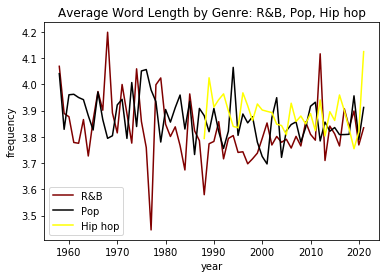

In [27]:
plt.plot(list(avelength_rnb.keys()), list(avelength_rnb.values()), label = 'R&B', color = 'maroon')
plt.plot(list(avelength_pop.keys()),list(avelength_pop.values()), label = 'Pop', color = 'black')
plt.plot(list(avelength_hip.keys()), list(avelength_hip.values()), label = 'Hip hop', color = 'yellow')
plt.xlabel('year')
plt.ylabel('frequency')
plt.legend()
plt.title('Average Word Length by Genre: R&B, Pop, Hip hop');

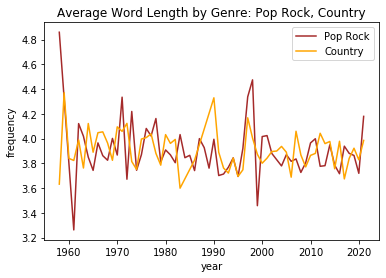

In [28]:
plt.plot(list(avelength_prck.keys()), list(avelength_prck.values()), label = 'Pop Rock', color = 'brown')
plt.plot(list(avelength_ctry.keys()), list(avelength_ctry.values()), label = 'Country', color = 'orange')
plt.xlabel('year')
plt.ylabel('frequency')
plt.legend()
plt.title('Average Word Length by Genre: Pop Rock, Country');

- Aside from a few outlier years, the results doesn't seem to be too different within genres

# Word Uniqueness
- Whether uniqueness of words (according to wordfreq package) changes over time

In [31]:
from wordfreq import word_frequency

In [32]:
word_frequency('is', 'en')

0.0117

In [33]:
word_frequency('rockabye', 'en')

4.9e-08

In [34]:
# word_rarity is dict with year as key and list of all tokens' sizes as values 
word_rarity = {}
# song_rarity is dict with year as key and list of average token size values
song_rarity = {}
year = list(range(1958, 2022))
for i in df.index:
    if df.loc[i, 'year'] not in word_rarity:
        word_rarity[df.loc[i, 'year']] = []
        song_rarity[df.loc[i, 'year']] = []
    song_rarity[df.loc[i, 'year']].append(np.mean([word_frequency(word, 'en') for word in df.loc[i, 'raw_tokens']]))
    word_rarity[df.loc[i, 'year']].extend([word_frequency(word, 'en') for word in df.loc[i, 'raw_tokens']])
# ave_word_rarity uses word_rarity and get the yearly average
ave_word_rarity = {}
for key, value in word_rarity.items():
    ave_word_rarity[key] = np.mean(value)

In [35]:
len(word_rarity[1958]), len(song_rarity[1958])

(15206, 49)

Text(0.5, 1.0, 'Average Word Rarity for All Words')

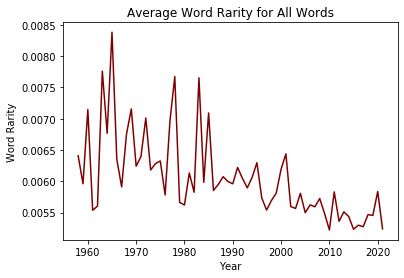

In [37]:
plt.plot(list(ave_word_rarity.keys()), list(ave_word_rarity.values()), color = 'maroon')
plt.xlabel('Year')
plt.ylabel('Word Rarity')
plt.title('Average Word Rarity for All Words')

- Average words seem to become more rare/unique over time

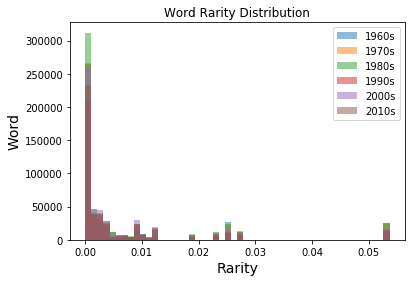

In [38]:
plt.hist([w for song in [word_rarity[year] for year in range(1960, 1970)] for w in song], bins=50, alpha=0.5, label="1960s")
plt.hist([w for song in [word_rarity[year] for year in range(1970, 1980)] for w in song], bins=50, alpha=0.5, label="1970s")
plt.hist([w for song in [word_rarity[year] for year in range(1980, 1990)] for w in song], bins=50, alpha=0.5, label="1980s")
plt.hist([w for song in [word_rarity[year] for year in range(1990, 2000)] for w in song], bins=50, alpha=0.5, label="1990s")
plt.hist([w for song in [word_rarity[year] for year in range(2000, 2010)] for w in song], bins=50, alpha=0.5, label="2000s")
plt.hist([w for song in [word_rarity[year] for year in range(2010, 2020)] for w in song], bins=50, alpha=0.5, label="2010s")
plt.xlabel("Rarity", size=14)
plt.ylabel("Word", size=14)
plt.title("Word Rarity Distribution")
plt.legend(loc='upper right')

- let's also try this with different genres

In [39]:
def word_rarity_by_genre(df, genre):
    '''Get average word rarity within a specified genre'''
    # word_rarity is dict with year as key and list of all tokens' sizes as values 
    word_rarity = {}
    year = list(range(1958, 2022))
    for i in df[df['song_genre'].str.contains(genre)].index:
        if df.loc[i, 'year'] not in word_rarity:
            word_rarity[df.loc[i, 'year']] = []
            song_rarity[df.loc[i, 'year']] = []
        song_rarity[df.loc[i, 'year']].append(np.mean([word_frequency(word, 'en') for word in df.loc[i, 'raw_tokens']]))
        word_rarity[df.loc[i, 'year']].extend([word_frequency(word, 'en') for word in df.loc[i, 'raw_tokens']])
    # ave_word_rarity uses word_rarity and get the yearly average
    ave_word_rarity = {}
    for key, value in word_rarity.items():
        ave_word_rarity[key] = np.mean(value)
    return ave_word_rarity

In [40]:
averarity_rnb = word_rarity_by_genre(genredf, 'R&B')
averarity_pop = word_rarity_by_genre(genredf, 'Pop')
averarity_hip = word_rarity_by_genre(genredf, 'Hip hop')
averarity_prck = word_rarity_by_genre(genredf, 'Pop rock')
averarity_ctry = word_rarity_by_genre(genredf, 'Country')

Text(0.5, 1.0, 'Word Rarity by Genre: R&B, Pop, Hip hop')

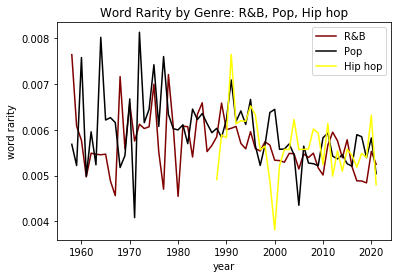

In [42]:
plt.plot(list(averarity_rnb.keys()), list(averarity_rnb.values()), label = 'R&B', color = 'maroon')
plt.plot(list(averarity_pop.keys()), list(averarity_pop.values()), label = 'Pop', color = 'black')
plt.plot(list(averarity_hip.keys()), list(averarity_hip.values()), label = 'Hip hop', color = 'yellow')
plt.xlabel('year')
plt.ylabel('word rarity')
plt.legend()
plt.title('Word Rarity by Genre: R&B, Pop, Hip hop')

Text(0.5, 1.0, 'Word Rarity by Genre: Pop rock, Country')

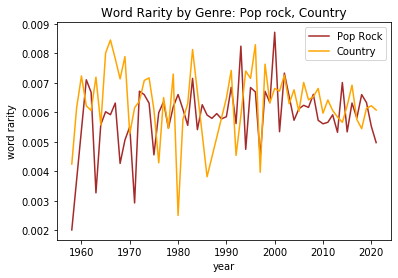

In [43]:
plt.plot(list(averarity_prck.keys()), list(averarity_prck.values()), label = 'Pop Rock', color = 'brown')
plt.plot(list(averarity_ctry.keys()), list(averarity_ctry.values()), label = 'Country', color = 'orange')
plt.xlabel('year')
plt.ylabel('word rarity')
plt.legend()
plt.title('Word Rarity by Genre: Pop rock, Country')

- The trend is more salient within R&B, Pop and Hip hop, which is consistent with our hypothesis (rap songs have more colloquial words)
- Pop Rock and Country songs are the opposite, with slightly increasing word rarity (more universal words)
- Although, it does seem interesting that after averaging over all words in all lyrics for a given year, there is still considerable variations in word rarity. This variance also decreases through time, which is worth noting.

- Now let's look at the top 20 most unique words for each year

In [44]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,no.,year,song,artist(s),song_wiki_url,artist_wiki_url,lyrics,song_genre,raw_tokens,lower_tokens,no_top50_sw,no_top100_sw,no_top150_sw,no_top200_sw,no_custom_sw,song_genre_list
0,0,0,0,1,1958,"""Volare""",Domenico Modugno,['https://en.wikipedia.org/wiki/Volare_(song)'],['https://en.wikipedia.org/wiki/Domenico_Modug...,Penso che un sogno cosi` non ritorni mai piu` ...,['Pop'],"[Penso, che, un, sogno, cosi`, non, ritorni, m...","[penso, che, un, sogno, cosi`, non, ritorni, m...","[penso, che, un, sogno, cosi`, non, ritorni, m...","[penso, che, un, sogno, cosi`, non, ritorni, m...","[penso, che, un, sogno, cosi`, non, ritorni, m...","[penso, che, un, sogno, cosi`, non, ritorni, m...","[penso, che, un, sogno, cosi`, non, ritorni, m...",[Pop]
1,1,1,1,2,1958,"""All I Have to Do Is Dream""",The Everly Brothers,['https://en.wikipedia.org/wiki/All_I_Have_to_...,['https://en.wikipedia.org/wiki/The_Everly_Bro...,Dream dream dream dream Dream dream drea...,"['Jangle pop', '[2]']","[Dream, dream, dream, dream, Dream, dream, dre...","[dream, dream, dream, dream, dream, dream, dre...","[dream, dream, dream, dream, dream, dream, dre...","[dream, dream, dream, dream, dream, dream, dre...","[dream, dream, dream, dream, dream, dream, dre...","[dream, dream, dream, dream, dream, dream, dre...","[dream, dream, dream, dream, dream, dream, dre...","[Jangle pop, [2]"
2,2,2,2,3,1958,"""Don't""",Elvis Presley,['https://en.wikipedia.org/wiki/Don%27t_(Elvis...,['https://en.wikipedia.org/wiki/Elvis_Presley'],Don't don't that's what you say Each time t...,"['Ballad', 'pop']","[Don't, don't, that's, what, you, say, Each, t...","[don't, don't, that's, what, you, say, each, t...","[that's, say, each, time, hold, way, feel, wan...","[each, hold, kiss, leave, embrace, arms, place...","[each, hold, kiss, leave, embrace, arms, place...","[each, kiss, embrace, arms, place, grows, cold...","[each, time, hold, feel, kiss, baby, leave, em...","[Ballad, pop]"
3,3,3,3,4,1958,"""Witch Doctor""",David Seville,['https://en.wikipedia.org/wiki/Witch_Doctor_(...,['https://en.wikipedia.org/wiki/Ross_Bagdasari...,{Movie version - DJ: Yeah! In the place to be!...,"['Comedy', 'rockabilly', 'scat', 'novelty', 'c...","[{Movie, version, -, DJ:, Yeah!, In, the, plac...","[{movie, version, -, dj:, yeah!, in, the, plac...","[{movie, version, dj:, yeah!, place, be!, chip...","[{movie, version, dj:, yeah!, place, be!, chip...","[{movie, version, dj:, yeah!, place, be!, chip...","[{movie, version, dj:, yeah!, place, be!, chip...","[{movie, version, dj:, yeah!, place, be!, chip...","[Comedy, rockabilly, scat, novelty, country]"
4,4,4,4,5,1958,"""Patricia""",Perez Prado,['https://en.wikipedia.org/wiki/Patricia_(Pere...,['https://en.wikipedia.org/wiki/Perez_Prado'],Kiss her and your lips will always want Patric...,unknown,"[Kiss, her, and, your, lips, will, always, wan...","[kiss, her, and, your, lips, will, always, wan...","[kiss, her, lips, will, always, want, patricia...","[kiss, lips, always, patricia, stroll, patrici...","[kiss, lips, patricia, stroll, patricia, move,...","[kiss, lips, patricia, stroll, patricia, move,...","[kiss, lips, always, patricia, stroll, patrici...",[unknown]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,6346,6346,6346,96,2021,"""Things a Man Oughta Know""",Lainey Wilson,['https://en.wikipedia.org/wiki/Things_a_Man_O...,['https://en.wikipedia.org/wiki/Lainey_Wilson'],I can hook a trailer on a two-inch hitch I ca...,['Country'],"[I, can, hook, a, trailer, on, a, two-inch, hi...","[i, can, hook, a, trailer, on, a, two-inch, hi...","[hook, trailer, two-inch, hitch, shoot, shotgu...","[hook, trailer, two-inch, hitch, shoot, shotgu...","[hook, trailer, two-inch, hitch, shoot, shotgu...","[hook, trailer, two-inch, hitch, shoot, shotgu...","[hook, trailer, two-inch, hitch, shoot, shotgu...",[Country]
6267,6347,6347,6347,97,2021,"""Throat Baby""",BRS Kash,['https://en.wikipedia.org/wiki/Throa

In [45]:
# this will take longer to run
most_rare_words = {}
year = list(range(1958, 2022))
for i in df.index:
    if df.loc[i, 'year'] not in most_rare_words:
        most_rare_words[df.loc[i, 'year']] = set()
    for word in df.loc[i, 'raw_tokens']:
        if len(most_rare_words[df.loc[i, 'year']]) >= 21:
            most_rare_words[df.loc[i, 'year']].add((word, word_frequency(word, 'en')))
            most_rare_words[df.loc[i, 'year']] = list(most_rare_words[df.loc[i, 'year']])
            most_rare_words[df.loc[i, 'year']].sort(key = lambda x: x[1])
            del most_rare_words[df.loc[i, 'year']][20]
            most_rare_words[df.loc[i, 'year']] = set(most_rare_words[df.loc[i, 'year']])
        else:
            most_rare_words[df.loc[i, 'year']].add((word, word_frequency(word, 'en')))
most_rare_words

KeyboardInterrupt: 

In [ ]:
most_rare_words_lst = {}
for year, s in most_rare_words.items():
    most_rare_words_lst[year] = [n[0] for n in list(s)]

In [ ]:
raredf = pd.DataFrame(most_rare_words_lst)
raredf[[1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]]

# Topic Models Attempted - see summary below
- split df into list of list of tokens for topic modeling
- specify stopwords settings
- specify cluster number
- run and visualize topic models

In [ ]:
# target_tokens = 'no_top50_sw'
# target_tokens = 'no_top100_sw'
# target_tokens = 'no_top150_sw'
# target_tokens = 'no_top200_sw'
target_tokens = 'no_custom_sw'
# target_tokens = 'raw_tokens'

In [ ]:
# split time slices
alllyrics = df[target_tokens].tolist()
lyrics1960s = df[df['year'] < 1970][target_tokens].tolist()
lyrics1970s = df[(df['year'] > 1970) & (df['year'] < 1980)][target_tokens].tolist()
lyrics1980s = df[(df['year'] > 1980) & (df['year'] < 1990)][target_tokens].tolist()
lyrics1990s = df[(df['year'] > 1990) & (df['year'] < 2000)][target_tokens].tolist()
lyrics2000s = df[(df['year'] > 2000) & (df['year'] < 2010)][target_tokens].tolist()
lyrics2010s = df[df['year'] > 2010][target_tokens].tolist()

In [ ]:
def topic_model(tokens, num_topics):
    dictionary = corpora.Dictionary([i for i in tokens])
    corpus = [dictionary.doc2bow(text) for text in tokens]
    model = models.ldamulticore.LdaMulticore(corpus = corpus,
                                            id2word = dictionary,
                                            num_topics = num_topics)
    return model, corpus, dictionary

In [ ]:
clusters = 5

In [ ]:
model1960s, corpus1960s, dict1960s = topic_model(lyrics1960s, clusters)
model1970s, corpus1970s, dict1970s = topic_model(lyrics1970s, clusters)
model1980s, corpus1980s, dict1980s = topic_model(lyrics1980s, clusters)
model1990s, corpus1990s, dict1990s = topic_model(lyrics1990s, clusters)
model2000s, corpus2000s, dict2000s = topic_model(lyrics2000s, clusters)
model2010s, corpus2010s, dict2010s = topic_model(lyrics2010s, clusters)
modelall,   corpusall,   dictall   = topic_model(alllyrics, clusters)

In [ ]:
modelname = modelall
corpusname = corpusall
dictname = dictall

In [ ]:
for i, topic in modelname.show_topics(formatted=False, num_words=20):
    print('Topic {}: \n{}'.format(i, [w[0] for w in topic]))

In [ ]:
# visualize
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(modelname, corpusname, dictname)
p

In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model1960s, corpus1960s, dict1960s)
p

In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model1970s, corpus1970s, dict1970s)
p

In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model1980s, corpus1980s, dict1980s)
p

In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model1990s, corpus1990s, dict1990s)
p

In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model2000s, corpus2000s, dict2000s)
p

In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model2010s, corpus2010s, dict2010s)
p

- After playing around with cluster number, year, stopwords, I can't seem to make it work. Perhaps topic models just aren't the right kind of model for analyzing lyrics.

# Dynamic Topic Models

- It seems that we don't even have good results with topic modeling, so I don't think we should do dynamic topic modeling.